In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings("ignore")

In [22]:
cd input

[WinError 2] 指定されたファイルが見つかりません。: 'input'
D:\python学習\GCI2019\competition3\input


In [23]:
train = pd.read_csv('train.csv')

In [72]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7134 entries, 0 to 7133
Data columns (total 36 columns):
assists                          7134 non-null int64
boosts                           7134 non-null int64
damageDealt                      7134 non-null float64
DBNOs                            7134 non-null int64
headshotKills                    7134 non-null int64
heals                            7134 non-null int64
killPlace                        7134 non-null int64
killPoints                       7134 non-null int64
kills                            7134 non-null int64
killStreaks                      7134 non-null int64
longestKill                      7134 non-null float64
matchDuration                    7134 non-null int64
matchType                        7134 non-null object
maxPlace                         7134 non-null int64
numGroups                        7134 non-null int64
rankPoints                       7134 non-null int64
revives                          7134 no

In [24]:
train.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,2860d3f9ee4d4b,46f1b1c3bf0dae,25ade93a241f39,0,0,0.0,0,0,0,80,...,0,0.0,0,0.0,0,0,257.0,4,0,0.167487
1,0b88c47e54cdcc,5e92598b08bcb1,95125f5e05c653,0,2,359.0,4,0,0,5,...,1,262.7,0,0.0,0,0,1025.0,5,1607,0.610492
2,8f086d61515bc4,ed4cfbc560f490,8a84da96d077c3,0,0,223.5,1,0,0,15,...,0,0.0,0,0.0,0,0,712.8,2,1736,0.666206
3,7c037ca62a38a4,d2ff4830704e19,a139eac809980a,0,0,128.1,0,0,0,50,...,0,0.0,0,0.0,0,0,2738.0,4,1476,0.722956
4,82f08cde238c60,7c5002766d8c7a,e9d203a36b1d0a,0,0,200.0,2,0,0,36,...,0,0.0,0,0.0,0,0,129.4,2,0,0.204095


In [7]:
train.isnull().sum()

Id                 0
groupId            0
matchId            0
assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
maxPlace           0
numGroups          0
rankPoints         0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
winPlacePerc       0
dtype: int64

In [26]:
train['playersJoined'] = train.groupby('matchId')['matchId'].transform('count')

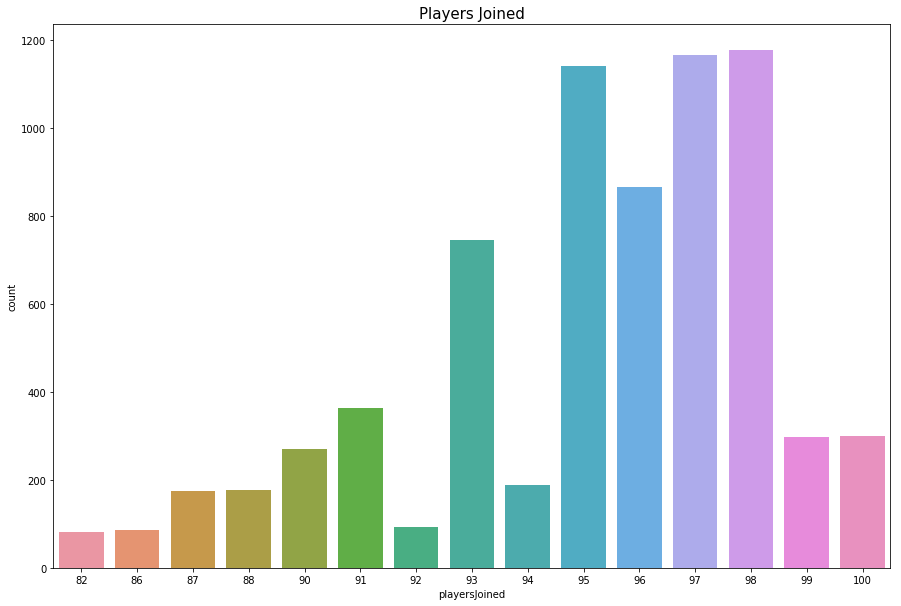

In [27]:
data = train.copy()
data = data[data['playersJoined']>49]
plt.figure(figsize=(15,10))
sns.countplot(data['playersJoined'])
plt.title("Players Joined",fontsize=15)
plt.show()

In [28]:
train['killsNorm'] = train['kills']*((100-train['playersJoined'])/100 + 1)
train['damageDealtNorm'] = train['damageDealt']*((100-train['playersJoined'])/100 + 1)
train[['playersJoined', 'kills', 'killsNorm', 'damageDealt', 'damageDealtNorm']][5:8]

,playersJoined,kills,killsNorm,damageDealt,damageDealtNorm
5,95,0,0.0,0.0,0.000
6,91,0,0.0,37.1,40.439
7,95,0,0.0,0.0,0.000


In [29]:
train['healsAndBoosts'] = train['heals']+train['boosts']
train['totalDistance'] = train['walkDistance']+train['rideDistance']+train['swimDistance']

In [30]:
train['boostsPerWalkDistance'] = train['boosts']/(train['walkDistance']+1) #The +1 is to avoid infinity, because there are entries where boosts>0 and walkDistance=0. Strange.
train['boostsPerWalkDistance'].fillna(0, inplace=True)
train['healsPerWalkDistance'] = train['heals']/(train['walkDistance']+1) #The +1 is to avoid infinity, because there are entries where heals>0 and walkDistance=0. Strange.
train['healsPerWalkDistance'].fillna(0, inplace=True)
train['healsAndBoostsPerWalkDistance'] = train['healsAndBoosts']/(train['walkDistance']+1) #The +1 is to avoid infinity.
train['healsAndBoostsPerWalkDistance'].fillna(0, inplace=True)
train[['walkDistance', 'boosts', 'boostsPerWalkDistance' ,'heals',  'healsPerWalkDistance', 'healsAndBoosts', 'healsAndBoostsPerWalkDistance']][40:45]

,walkDistance,boosts,boostsPerWalkDistance,heals,healsPerWalkDistance,healsAndBoosts,healsAndBoostsPerWalkDistance
40,48.950,0,0.0,0,0.000000,0,0.000000
41,43.730,0,0.0,0,0.000000,0,0.000000
42,6.587,0,0.0,0,0.000000,0,0.000000
43,168.300,0,0.0,0,0.000000,0,0.000000
44,264.500,0,0.0,1,0.003766,1,0.003766


In [31]:
train['killsPerWalkDistance'] = train['kills']/(train['walkDistance']+1) #The +1 is to avoid infinity, because there are entries where kills>0 and walkDistance=0. Strange.
train['killsPerWalkDistance'].fillna(0, inplace=True)
train[['kills', 'walkDistance', 'rideDistance', 'killsPerWalkDistance', 'winPlacePerc']].sort_values(by='killsPerWalkDistance').tail(10)

,kills,walkDistance,rideDistance,killsPerWalkDistance,winPlacePerc
1516,2,26.300,0.0,0.073260,0.487145
1156,1,11.320,0.0,0.081169,0.037027
6469,1,10.300,0.0,0.088496,0.363908
870,2,21.310,0.0,0.089646,0.166850
2429,1,9.884,0.0,0.091878,0.208788
672,1,7.780,0.0,0.113895,0.067736
1256,1,7.437,0.0,0.118526,0.037715
2834,1,6.491,0.0,0.133494,0.000000
5616,2,11.780,0.0,0.156495,0.037616
5270,1,2.759,0.0,0.266028,0.038579


In [32]:
train['team'] = [1 if i>50 else 2 if (i>25 & i<=50) else 4 for i in train['numGroups']]

In [33]:
train.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,playersJoined,killsNorm,damageDealtNorm,healsAndBoosts,totalDistance,boostsPerWalkDistance,healsPerWalkDistance,healsAndBoostsPerWalkDistance,killsPerWalkDistance,team
0,2860d3f9ee4d4b,46f1b1c3bf0dae,25ade93a241f39,0,0,0.0,0,0,0,80,...,96,0.00,0.000,0,257.0,0.000000,0.0,0.000000,0.000000,2
1,0b88c47e54cdcc,5e92598b08bcb1,95125f5e05c653,0,2,359.0,4,0,0,5,...,96,4.16,373.360,2,1287.7,0.001949,0.0,0.001949,0.003899,2
2,8f086d61515bc4,ed4cfbc560f490,8a84da96d077c3,0,0,223.5,1,0,0,15,...,95,2.10,234.675,0,712.8,0.000000,0.0,0.000000,0.002802,2
3,7c037ca62a38a4,d2ff4830704e19,a139eac809980a,0,0,128.1,0,0,0,50,...,99,0.00,129.381,0,2738.0,0.000000,0.0,0.000000,0.000000,2
4,82f08cde238c60,7c5002766d8c7a,e9d203a36b1d0a,0,0,200.0,2,0,0,36,...,100,1.00,200.000,0,129.4,0.000000,0.0,0.000000,0.007669,2


In [74]:
train['matchType']

0             duo
1         duo-fpp
2         duo-fpp
3       squad-fpp
4       squad-fpp
5        solo-fpp
6             duo
7         duo-fpp
8         duo-fpp
9         duo-fpp
10      squad-fpp
11        duo-fpp
12            duo
13        duo-fpp
14       solo-fpp
15      squad-fpp
16      squad-fpp
17            duo
18          squad
19      squad-fpp
20            duo
21       solo-fpp
22          squad
23        duo-fpp
24      squad-fpp
25      squad-fpp
26          squad
27        duo-fpp
28       crashfpp
29        duo-fpp
          ...    
7104          duo
7105    squad-fpp
7106        squad
7107    squad-fpp
7108      duo-fpp
7109     crashfpp
7110      duo-fpp
7111         solo
7112        squad
7113     solo-fpp
7114    squad-fpp
7115    squad-fpp
7116      duo-fpp
7117    squad-fpp
7118     solo-fpp
7119      duo-fpp
7120      duo-fpp
7121         solo
7122    squad-fpp
7123    squad-fpp
7124    squad-fpp
7125    squad-fpp
7126      duo-fpp
7127         solo
7128      

In [34]:
drop_features = ["Id", "groupId", "matchId"]
train.drop(drop_features,axis = 1,inplace = True)

In [35]:
train.head()

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,...,playersJoined,killsNorm,damageDealtNorm,healsAndBoosts,totalDistance,boostsPerWalkDistance,healsPerWalkDistance,healsAndBoostsPerWalkDistance,killsPerWalkDistance,team
0,0,0,0.0,0,0,0,80,0,0,0,...,96,0.00,0.000,0,257.0,0.000000,0.0,0.000000,0.000000,2
1,0,2,359.0,4,0,0,5,1387,4,2,...,96,4.16,373.360,2,1287.7,0.001949,0.0,0.001949,0.003899,2
2,0,0,223.5,1,0,0,15,1673,2,1,...,95,2.10,234.675,0,712.8,0.000000,0.0,0.000000,0.002802,2
3,0,0,128.1,0,0,0,50,1479,0,0,...,99,0.00,129.381,0,2738.0,0.000000,0.0,0.000000,0.000000,2
4,0,0,200.0,2,0,0,36,0,1,1,...,100,1.00,200.000,0,129.4,0.000000,0.0,0.000000,0.007669,2


In [41]:
features = pd.get_dummies(train.drop(['winPlacePerc'], axis = 1))
labels = np.array(train['winPlacePerc'])

In [37]:
from sklearn.ensemble import RandomForestRegressor

C:\Users\uncha\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [38]:
RFmodel = RandomForestRegressor(n_estimators=80, random_state=1937, n_jobs=3, min_samples_leaf=3, max_features='sqrt')

In [42]:
RFmodel.fit(features, labels)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=3, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=80, n_jobs=3,
           oob_score=False, random_state=1937, verbose=0, warm_start=False)

In [54]:
test = pd.read_csv('test.csv')

In [55]:
data_t = test.copy()
data_t.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints
0,c9ce5e5749758a,d1d34623858d02,6533442a513d6f,0,0,100.0,1,1,0,38,...,1431,0,0.0,0,0.0,0,0,168.4,1,0
1,262418e6a1fd89,f0290ae9582198,976f4ae3c91669,0,0,0.0,0,0,0,76,...,-1,0,0.0,0,0.0,0,0,280.7,3,1639
2,1fdaad049557d9,d1d34623858d02,6533442a513d6f,1,0,57.0,1,0,0,71,...,1490,0,0.0,0,0.0,0,0,202.7,4,0
3,cb1761d22b957e,77234d376925f9,efd749a746587e,0,0,0.0,0,0,1,72,...,-1,0,0.0,0,0.0,0,0,123.1,2,1465
4,1b86424e60c2e8,19a7b7ce87c841,098d3f2da942e7,0,1,348.1,1,0,2,16,...,-1,0,0.0,0,0.0,0,0,1372.0,5,1398


In [56]:
test['playersJoined'] = test.groupby('matchId')['matchId'].transform('count')

In [57]:
test['killsNorm'] = test['kills']*((100-test['playersJoined'])/100 + 1)
test['damageDealtNorm'] = test['damageDealt']*((100-test['playersJoined'])/100 + 1)
test[['playersJoined', 'kills', 'killsNorm', 'damageDealt', 'damageDealtNorm']][5:8]

,playersJoined,kills,killsNorm,damageDealt,damageDealtNorm
5,97,0,0.0,0.0,0.0
6,98,0,0.0,0.0,0.0
7,98,0,0.0,0.0,0.0


In [58]:
test['healsAndBoosts'] = test['heals']+test['boosts']
test['totalDistance'] = test['walkDistance']+test['rideDistance']+test['swimDistance']

In [59]:
test['boostsPerWalkDistance'] = train['boosts']/(test['walkDistance']+1) #The +1 is to avoid infinity, because there are entries where boosts>0 and walkDistance=0. Strange.
test['boostsPerWalkDistance'].fillna(0, inplace=True)
test['healsPerWalkDistance'] = test['heals']/(test['walkDistance']+1) #The #The +1 is to avoid infinity, because there are entries where heals>0 and walkDistance=0. Strange.
test['healsPerWalkDistance'].fillna(0, inplace=True)
test['healsAndBoostsPerWalkDistance'] = test['healsAndBoosts']/(test['walkDistance']+1) #The +1 is to avoid infinity.
test['healsAndBoostsPerWalkDistance'].fillna(0, inplace=True)
test[['walkDistance', 'boosts', 'boostsPerWalkDistance' ,'heals',  'healsPerWalkDistance', 'healsAndBoosts', 'healsAndBoostsPerWalkDistance']][40:45]

,walkDistance,boosts,boostsPerWalkDistance,heals,healsPerWalkDistance,healsAndBoosts,healsAndBoostsPerWalkDistance
40,4045.0,3,0.0,9,0.002224,12,0.002966
41,1720.0,3,0.0,1,0.000581,4,0.002324
42,393.1,1,0.0,1,0.002537,2,0.005075
43,104.4,0,0.0,0,0.000000,0,0.000000
44,194.9,0,0.0,0,0.000000,0,0.000000


In [61]:
test['killsPerWalkDistance'] = test['kills']/(test['walkDistance']+1) #The +1 is to avoid infinity, because there are entries where kills>0 and walkDistance=0. Strange.
test['killsPerWalkDistance'].fillna(0, inplace=True)
test[['kills', 'walkDistance', 'rideDistance', 'killsPerWalkDistance']].sort_values(by='killsPerWalkDistance').tail(10)

,kills,walkDistance,rideDistance,killsPerWalkDistance
547,1,22.240,0.0,0.043029
252,2,43.340,0.0,0.045106
315,2,40.080,0.0,0.048685
50,1,18.520,0.0,0.051230
756,1,14.640,0.0,0.063939
298,2,27.850,0.0,0.069324
1523,1,13.420,0.0,0.069348
721,1,9.629,0.0,0.094082
145,1,7.079,0.0,0.123778
744,1,6.997,0.0,0.125047


In [62]:
test['team'] = [1 if i>50 else 2 if (i>25 & i<=50) else 4 for i in test['numGroups']]

In [80]:
features.head()

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,...,healsAndBoostsPerWalkDistance,killsPerWalkDistance,team,matchType_crashfpp,matchType_duo,matchType_duo-fpp,matchType_solo,matchType_solo-fpp,matchType_squad,matchType_squad-fpp
0,0,0,0.0,0,0,0,80,0,0,0,...,0.000000,0.000000,2,0,1,0,0,0,0,0
1,0,2,359.0,4,0,0,5,1387,4,2,...,0.001949,0.003899,2,0,0,1,0,0,0,0
2,0,0,223.5,1,0,0,15,1673,2,1,...,0.000000,0.002802,2,0,0,1,0,0,0,0
3,0,0,128.1,0,0,0,50,1479,0,0,...,0.000000,0.000000,2,0,0,0,0,0,0,1
4,0,0,200.0,2,0,0,36,0,1,1,...,0.000000,0.007669,2,0,0,0,0,0,0,1


In [75]:
test_df = pd.get_dummies(test.drop(['Id','groupId','matchId'], axis = 1))


In [79]:
test_df.head()

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,...,healsAndBoostsPerWalkDistance,killsPerWalkDistance,team,matchType_duo,matchType_duo-fpp,matchType_normal-squad-fpp,matchType_solo,matchType_solo-fpp,matchType_squad,matchType_squad-fpp
0,0,0,100.0,1,1,0,38,0,1,1,...,0.000000,0.005903,2,0,0,0,0,0,0,1
1,0,0,0.0,0,0,0,76,1278,0,0,...,0.000000,0.000000,2,1,0,0,0,0,0,0
2,1,0,57.0,1,0,0,71,0,0,0,...,0.000000,0.000000,2,0,0,0,0,0,0,1
3,0,0,0.0,0,0,1,72,1191,0,0,...,0.008058,0.000000,2,0,1,0,0,0,0,0
4,0,1,348.1,1,0,2,16,1210,2,2,...,0.002185,0.001457,2,0,1,0,0,0,0,0


In [81]:
prediction = RFmodel.predict(test_df)

In [82]:
submission = pd.DataFrame({"winPlacePerc":prediction})

In [83]:
submission.head()

,winPlacePerc
0,0.152355
1,0.273492
2,0.268593
3,0.240221
4,0.556636


In [84]:
submission.to_csv("submission1.csv", index=False)

In [52]:
test = pd.get_dummies(test)